In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import powerlaw
import scipy.stats as st
import statsmodels as sm
import seaborn as sns
import statsmodels.api as sm
import warnings
import os

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
os.chdir('..')
original = pd.read_csv("Boltzmann_Wealth_SavingPropensity\Model_Network\Data\lamda0.45.csv")
original.head()

,Step,AgentID,mi,mt
0,0,0,100.0,1.0
1,0,1,100.0,1.0
2,0,2,100.0,1.0
3,0,3,100.0,1.0
4,0,4,100.0,1.0


In [3]:
mymodel = pd.read_csv("FinalModel\AlbertBarabasi\Steps1000b_is_35_w_is_RANDOM_alpha_0.69\Agent.csv")
mymodel.head()
#print(os.path.dirname(os.getcwd()))

,Step,AgentID,mi,lamda,mt
0,0,0,100.0,0.8,1.0
1,0,1,100.0,0.5,1.0
2,0,2,100.0,0.6,1.0
3,0,3,100.0,0.5,1.0
4,0,4,100.0,0.7,1.0


In [4]:
#moving one folder up
os.chdir('..')
os.chdir('Codes\ClassificationAndFit')

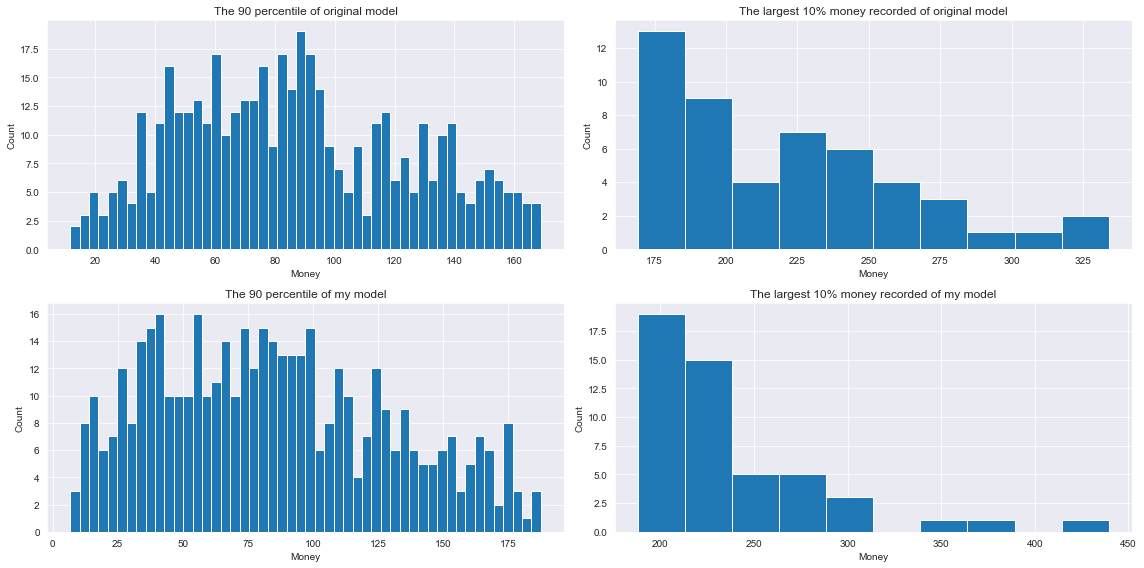

In [5]:
money_or = original.loc[original["Step"] == 6000, 'mi'].reset_index(drop = True).to_numpy()
money_or.sort()
length = len(money_or)
upper = int(0.9*length)
l10_or = []
u10_or = []
for i in range(0, upper):
    l10_or.append(money_or[i])
for i in range(upper, length):
    u10_or.append(money_or[i])
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize = (16,8))
ax1.hist(l10_or, bins = 50)
ax1.set_xlabel("Money")
ax1.set_ylabel("Count")
ax1.set_title("The 90 percentile of original model")
ax2.hist(u10_or, bins = 10)
ax2.set_xlabel("Money")
ax2.set_ylabel("Count")
ax2.set_title("The largest 10% money recorded of original model")
money_my = mymodel.loc[mymodel["Step"] == 1000, 'mi'].reset_index(drop = True).to_numpy()
money_my.sort()
length = len(money_my)
upper = int(0.9*length)
l10_my = []
u10_my = []
for i in range(0, upper):
    l10_my.append(money_my[i])
for i in range(upper, length):
    u10_my.append(money_my[i])
ax3.hist(l10_my, bins = 50)
ax3.set_xlabel("Money")
ax3.set_ylabel("Count")
ax3.set_title("The 90 percentile of my model")
ax4.hist(u10_my, bins = 10)
ax4.set_xlabel("Money")
ax4.set_ylabel("Count")
ax4.set_title("The largest 10% money recorded of my model")
fig.tight_layout()
plt.savefig("Histogram_Distribution");

<h3> Powerlaw fitting using Powerlaw

Calculating best minimal value for power law fit


11.12644185735417
245.678


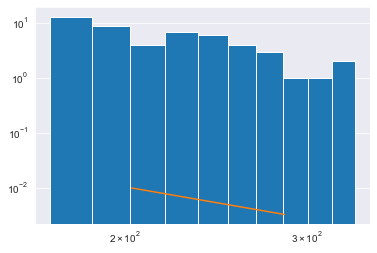

In [6]:
#experimenting
res_original = powerlaw.Fit(u10_or) 
print(res_original.power_law.alpha)
print(res_original.power_law.xmin)
R, p = res_original.distribution_compare('power_law', 'lognormal')
ax = plt.gca()
#res_original.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
ax.hist(u10_or)
powerlaw.plot_pdf(u10_or);

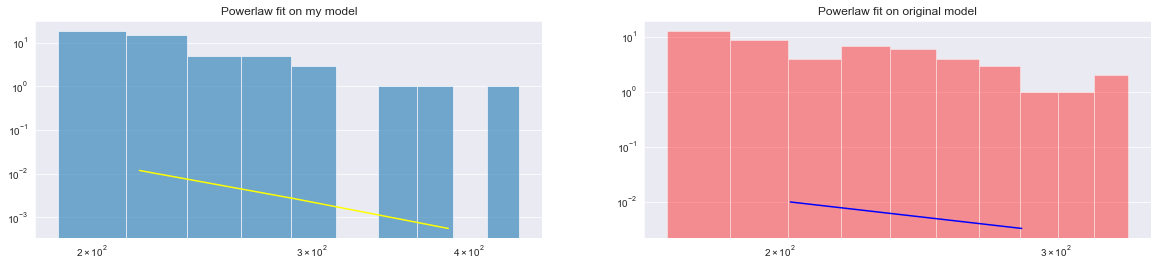

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,4))
ax1.hist(u10_my, alpha = 0.6)
ax2.hist(u10_or, color = 'red', alpha = 0.4)
#plt.ylim(0,20)
powerlaw.plot_pdf(u10_my, color = 'yellow', ax = ax1)
powerlaw.plot_pdf(u10_or, color = 'blue', ax = ax2)
ax1.set_title("Powerlaw fit on my model")
ax2.set_title("Powerlaw fit on original model")
plt.savefig("Powerlaw_temp");

<h3> Powerlaw fitting using Scipy stats

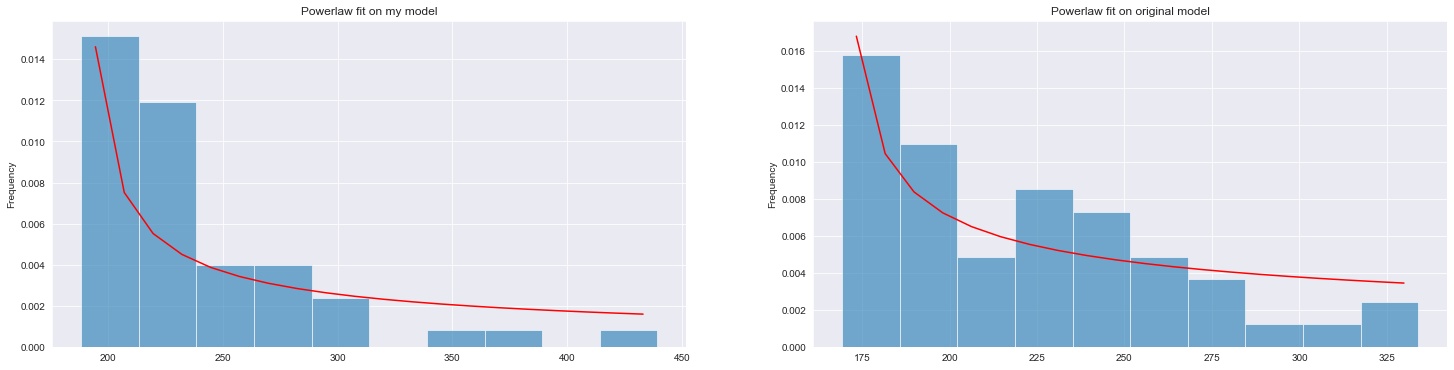

In [8]:
fig, ax = plt.subplots(1,2, figsize = (25,6))

data = [u10_my, u10_or]

for i in range(len(data)):
    data[i] = pd.Series(data[i])
    data[i].plot(kind='hist', bins=10, normed=True, alpha=0.6, ax = ax[i])
    
    # Get histogram of original data
    y, x = np.histogram(data[i], bins=20, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    # fit dist to data
    params = st.powerlaw.fit(data[i])
    
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF
    pdf = st.powerlaw.pdf(x, loc=loc, scale=scale, *arg)
    ax[i].plot(x,pdf, color = 'red')
    
    
ax[0].set_title("Powerlaw fit on my model")
ax[1].set_title("Powerlaw fit on original model")
plt.savefig("Powerlaw_fitting")

<h3> Fitting with normal distribution

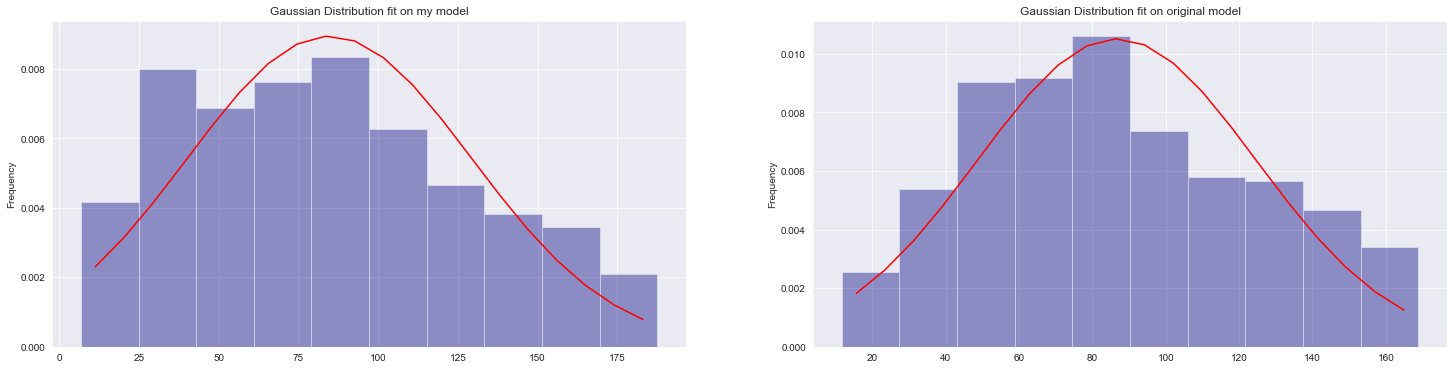

In [12]:
fig, ax = plt.subplots(1,2, figsize = (25,6))

data = [l10_my, l10_or]

for i in range(len(data)):
    data[i] = pd.Series(data[i])
    data[i].plot(kind='hist', bins=10, normed=True, alpha=0.4, ax = ax[i], color = 'navy')
    
    # Get histogram of original data
    y, x = np.histogram(data[i], bins=20, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    # fit dist to data
    params = st.norm.fit(data[i])
    
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF
    pdf = st.norm.pdf(x, loc=loc, scale=scale, *arg)
    ax[i].plot(x,pdf, color = 'red')
    
    
ax[0].set_title("Gaussian Distribution fit on my model")
ax[1].set_title("Gaussian Distribution fit on original model")
plt.savefig("Gaussian_fitting")